In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as st
from sklearn.calibration import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.preprocessing import StandardScaler

In [36]:
df =  pd.read_csv(r'..\DataSet\Clean\phosphateQuantite.csv')

In [37]:
df.isnull().sum()

Unnamed: 0            0
Entity                0
Code                  0
Year                  0
Nutrient potash       0
Nutrient phosphate    0
Nutrient nitrogen     0
dtype: int64

In [38]:
df = df[df["Nutrient potash"].notnull()]
df

Unnamed: 0       Entity Code  Year  Nutrient potash  Nutrient phosphate  \
0              2  Afghanistan  AFG  2013              0.0              1539.0   
1              3  Afghanistan  AFG  2014              0.0              1541.0   
2              4  Afghanistan  AFG  2015              0.0              1541.0   
3              5  Afghanistan  AFG  2016              0.0              1541.0   
4              6  Afghanistan  AFG  2017              0.0              1541.0   
...          ...          ...  ...   ...              ...                 ...   
1603        7614     Zimbabwe  ZWE  2016              0.0              2100.0   
1604        7615     Zimbabwe  ZWE  2017              0.0              9500.0   
1605        7616     Zimbabwe  ZWE  2018              0.0              8100.0   
1606        7617     Zimbabwe  ZWE  2019              0.0              8100.0   
1607        7618     Zimbabwe  ZWE  2020              0.0              8100.0   

      Nutrient nitrogen  
0               15694.0  
1               14416.0  
2               14416.0  
3               14416.0  
4               14416.0  
...                 ...  
1603            11700.0  
1604            12300.0  
1605            13200.0  
1606            13200.0  
1607            13200.0  

[1608 rows x 7 columns]

In [39]:
df = df[df["Nutrient nitrogen"].notnull()]
df

Unnamed: 0       Entity Code  Year  Nutrient potash  Nutrient phosphate  \
0              2  Afghanistan  AFG  2013              0.0              1539.0   
1              3  Afghanistan  AFG  2014              0.0              1541.0   
2              4  Afghanistan  AFG  2015              0.0              1541.0   
3              5  Afghanistan  AFG  2016              0.0              1541.0   
4              6  Afghanistan  AFG  2017              0.0              1541.0   
...          ...          ...  ...   ...              ...                 ...   
1603        7614     Zimbabwe  ZWE  2016              0.0              2100.0   
1604        7615     Zimbabwe  ZWE  2017              0.0              9500.0   
1605        7616     Zimbabwe  ZWE  2018              0.0              8100.0   
1606        7617     Zimbabwe  ZWE  2019              0.0              8100.0   
1607        7618     Zimbabwe  ZWE  2020              0.0              8100.0   

      Nutrient nitrogen  
0               15694.0  
1               14416.0  
2               14416.0  
3               14416.0  
4               14416.0  
...                 ...  
1603            11700.0  
1604            12300.0  
1605            13200.0  
1606            13200.0  
1607            13200.0  

[1608 rows x 7 columns]

In [40]:
df.isnull().sum()

Unnamed: 0            0
Entity                0
Code                  0
Year                  0
Nutrient potash       0
Nutrient phosphate    0
Nutrient nitrogen     0
dtype: int64

In [41]:
df.shape

(1608, 7)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1608 entries, 0 to 1607
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1608 non-null   int64  
 1   Entity              1608 non-null   object 
 2   Code                1608 non-null   object 
 3   Year                1608 non-null   int64  
 4   Nutrient potash     1608 non-null   float64
 5   Nutrient phosphate  1608 non-null   float64
 6   Nutrient nitrogen   1608 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 100.5+ KB


In [43]:
df.head()

Unnamed: 0       Entity Code  Year  Nutrient potash  Nutrient phosphate  \
0           2  Afghanistan  AFG  2013              0.0              1539.0   
1           3  Afghanistan  AFG  2014              0.0              1541.0   
2           4  Afghanistan  AFG  2015              0.0              1541.0   
3           5  Afghanistan  AFG  2016              0.0              1541.0   
4           6  Afghanistan  AFG  2017              0.0              1541.0   

   Nutrient nitrogen  
0            15694.0  
1            14416.0  
2            14416.0  
3            14416.0  
4            14416.0

In [44]:
df = df[df['Nutrient phosphate'] > 0.0]

In [45]:
df.head()

Unnamed: 0       Entity Code  Year  Nutrient potash  Nutrient phosphate  \
0           2  Afghanistan  AFG  2013              0.0              1539.0   
1           3  Afghanistan  AFG  2014              0.0              1541.0   
2           4  Afghanistan  AFG  2015              0.0              1541.0   
3           5  Afghanistan  AFG  2016              0.0              1541.0   
4           6  Afghanistan  AFG  2017              0.0              1541.0   

   Nutrient nitrogen  
0            15694.0  
1            14416.0  
2            14416.0  
3            14416.0  
4            14416.0

In [46]:
df.describe()

Unnamed: 0         Year  Nutrient potash  Nutrient phosphate  \
count  1608.000000  1608.000000     1.608000e+03        1.608000e+03   
mean   4059.505597  2000.179726     1.984169e+06        2.203459e+06   
std    2270.970532    16.549356     5.582341e+06        6.711983e+06   
min       2.000000  1961.000000     0.000000e+00        2.000000e-01   
25%    2419.750000  1989.000000     0.000000e+00        7.563526e+04   
50%    3652.500000  2005.000000     1.794150e+04        2.726500e+05   
75%    6257.250000  2013.250000     1.061205e+06        6.582500e+05   
max    7618.000000  2020.000000     4.592572e+07        4.853090e+07   

       Nutrient nitrogen  
count       1.608000e+03  
mean        4.845103e+06  
std         1.563939e+07  
min         0.000000e+00  
25%         1.570006e+05  
50%         7.285240e+05  
75%         1.833250e+06  
max         1.239874e+08

In [47]:
df.columns

Index(['Unnamed: 0', 'Entity', 'Code', 'Year', 'Nutrient potash',
       'Nutrient phosphate', 'Nutrient nitrogen'],
      dtype='object')

In [48]:
data = df

In [49]:
# Créer un histogramme
plt.figure(figsize=(10, 6))  # Taille de la figure
plt.bar(df['Year'], df['Nutrient phosphate'])
plt.xlabel('Année')
plt.ylabel('Nutrient phosphate')
plt.title('Histogramme des prix par année')
plt.xticks(df['Year'], rotation=45)  # Rotation des étiquettes de l'axe des x pour la lisibilité

plt.tight_layout()  # Ajustement automatique de la disposition
plt.show()

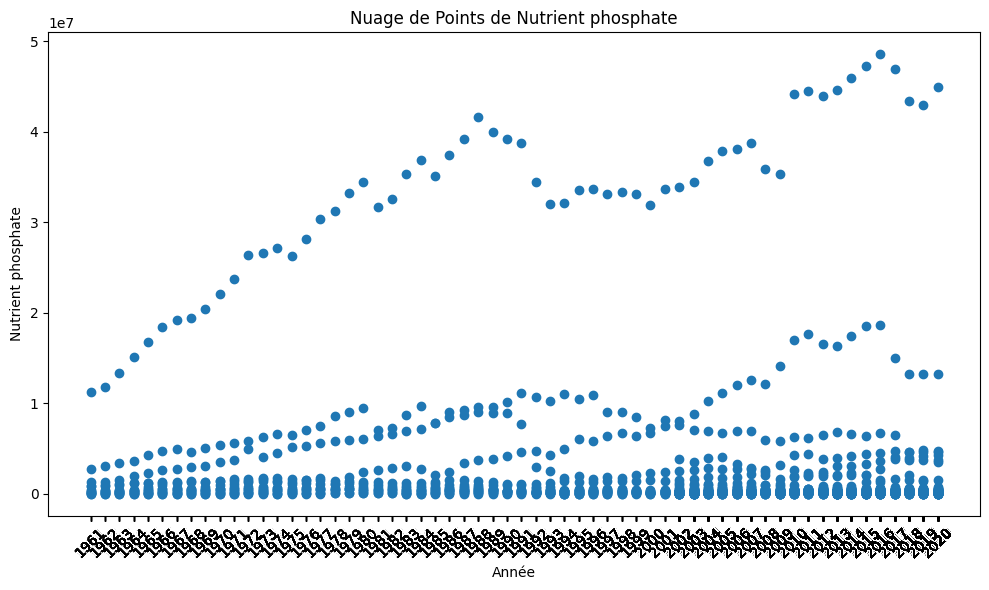

In [50]:
# Créer un nuage de points
plt.figure(figsize=(10, 6))  # Taille de la figure
plt.scatter(df['Year'], df['Nutrient phosphate'])
plt.xlabel('Année')
plt.ylabel('Nutrient phosphate')
plt.title('Nuage de Points de Nutrient phosphate')
plt.xticks(df['Year'], rotation=45)  # Rotation des étiquettes de l'axe des x pour la lisibilité

plt.tight_layout()  # Ajustement automatique de la disposition
plt.show()

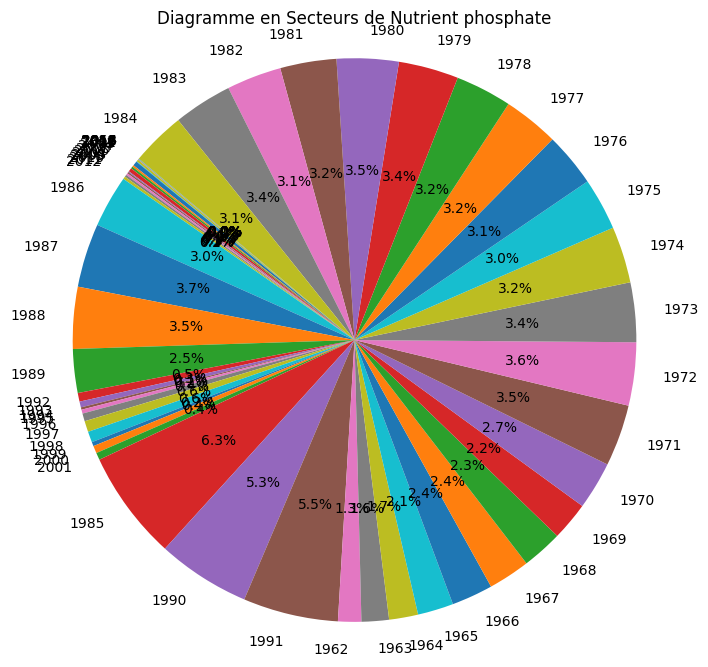

In [51]:
df_unique_years = df.drop_duplicates(subset=['Year'])

# Créer un diagramme en secteurs
plt.figure(figsize=(8, 8))  # Taille de la figure
plt.pie(df_unique_years['Nutrient phosphate'], labels=df_unique_years['Year'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Diagramme en Secteurs de Nutrient phosphate')

plt.show()

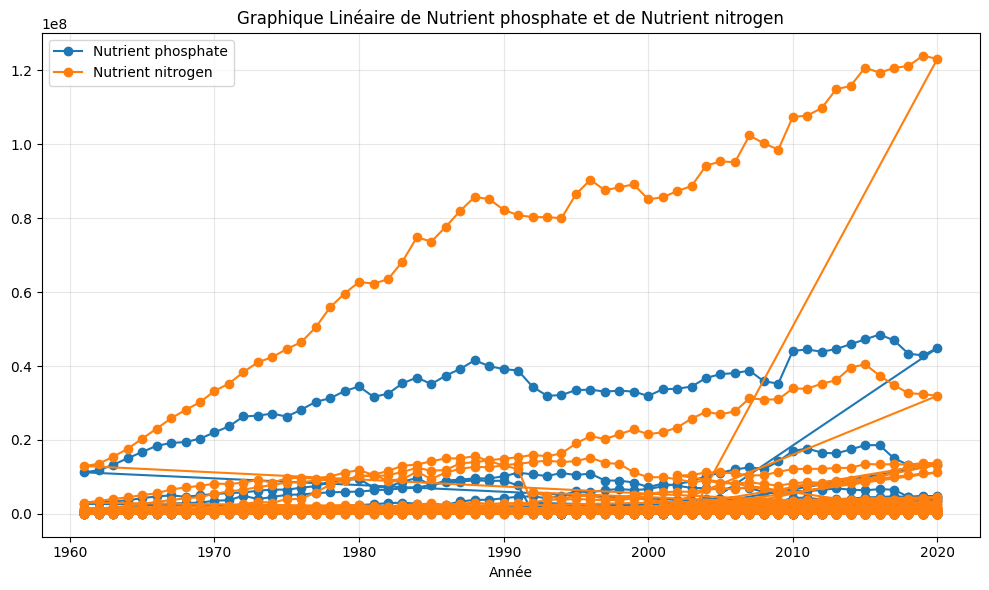

In [52]:
plt.figure(figsize=(10, 6))

# Plot lines for Phosphate Price and Diesel Price
plt.plot(df['Year'], df['Nutrient phosphate'], marker='o', label='Nutrient phosphate')
plt.plot(df['Year'], df['Nutrient nitrogen'], marker='o', label='Nutrient nitrogen')

# Customize the plot
plt.xlabel('Année')
plt.ylabel('')
plt.title('Graphique Linéaire de Nutrient phosphate et de Nutrient nitrogen')
plt.legend()

# Show the plot
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

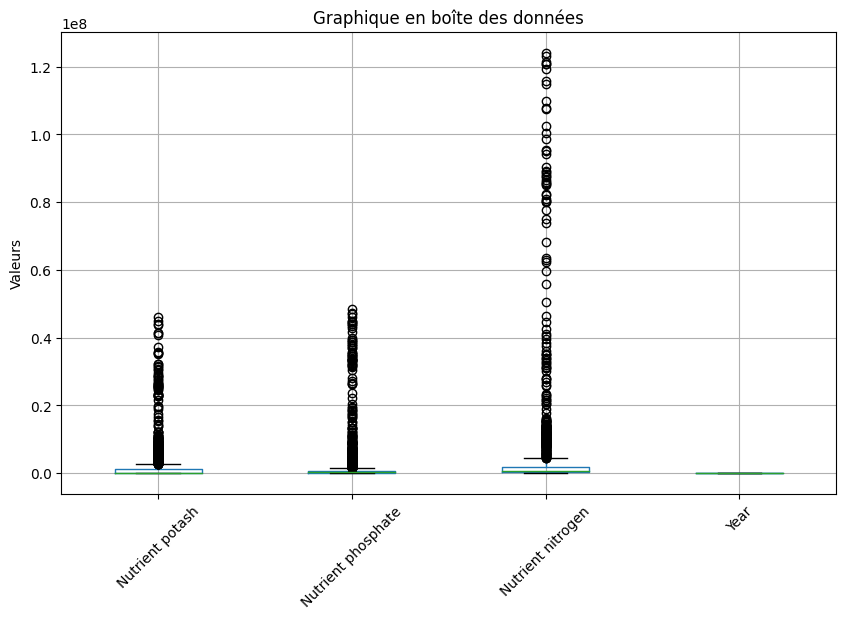

In [53]:
plt.figure(figsize=(10, 6))
df.boxplot(column=["Nutrient potash", "Nutrient phosphate", "Nutrient nitrogen", "Year"])
plt.title("Graphique en boîte des données")
plt.ylabel("Valeurs")
plt.xticks(rotation=45)
plt.show()

In [54]:
# Créer un graphique à aire
# Create a pivot table
df_pivot = df.pivot(index='Year', columns='Nutrient phosphate', values='Nutrient nitrogen')

# Create an area plot with enhanced visibility
ax = df_pivot.plot(kind='area', stacked=True, figsize=(10, 6), cmap='tab20')

# Customize the plot
plt.xlabel('Année')
plt.ylabel('Demande (milliers de tonnes)')
plt.title('Graphique à Aire de la Demande par Année et Produit')
plt.legend(title='Mois', bbox_to_anchor=(1, 1))
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

ValueError: Index contains duplicate entries, cannot reshape

In [55]:
XT = LabelEncoder()
df['Entity'] = XT.fit_transform(df['Entity'])

In [56]:
X = df[['Entity','Year', 'Nutrient potash', 'Nutrient nitrogen']]
y = df['Nutrient phosphate']

In [57]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.26, random_state=0)

In [58]:
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [59]:
mlr_score = mlr.score(x_test, y_test)
pred_mlr = mlr.predict(x_test)
print("Multiple Linear Regression Model Score:", round(mlr_score * 100, 2))

Multiple Linear Regression Model Score: 96.05


In [60]:
expl_rf = explained_variance_score(pred_mlr, y_test)

In [61]:
expl_rf

0.954893012175188

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.26, random_state=0)
RFR = RandomForestRegressor(n_estimators=28, random_state=0)
RFR.fit(X_train,y_train)

RandomForestRegressor(n_estimators=28, random_state=0)

In [63]:
RFR_score = RFR.score(X_test, y_test)
pred_RFR = RFR.predict(X_test)
print("Random Forest Regressor Model Score:", round(RFR_score * 100, 2))

Random Forest Regressor Model Score: 99.28


In [64]:
DTR = DecisionTreeRegressor()
DTR.fit(X_train,y_train)

DecisionTreeRegressor()

In [65]:
dtr_score = DTR.score(X_test, y_test)
pred_dtr = DTR.predict(x_test)
print("Decision Tree Regressor Model Score:", round(dtr_score * 100, 2))

Decision Tree Regressor Model Score: 94.18


C:\Users\oki\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [66]:
input_test = pd.DataFrame({'Entity': [1],
    'Year': [2024],
    'Nutrient potash':[1899.0],
    'Nutrient nitrogen': [0.0]
 })

input = scaler.transform(input_test)


pred_mlr_july = mlr.predict(input)
pred_RFR_july = RFR.predict(input_test)
pred_DTR_july = DTR.predict(input_test)



print("Predicted Phosphate Price for July 2024 (MLR):", pred_mlr_july[0])
print("Predicted Phosphate Price for July 2024 (RFR):", pred_RFR_july[0])
print("Predicted Phosphate Price for July 2024 (DTR):", pred_DTR_july[0])

Predicted Phosphate Price for July 2024 (MLR): -938935.5060124155
Predicted Phosphate Price for July 2024 (RFR): 83341.59642857143
Predicted Phosphate Price for July 2024 (DTR): 110000.0


In [68]:
import pickle

pickle.dump(RFR, open('../model_save/modelQuantity_RFR.pkl', 'wb'))
